<a href="https://colab.research.google.com/github/bharathbolla/EVA5/blob/S11/EVA5_Session11_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datetime import datetime 
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-10-10 16:31:21.076184


In [ ]:
!nvidia-smi

Sat Oct 10 16:31:23 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/EVA5/S11_Assignment/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/EVA5/S11_Assignment


#Importing modules


In [3]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
%matplotlib inline
import matplotlib.pyplot as plt
import torchvision
from tqdm import tqdm
import numpy as np
import torchvision.transforms as transforms
import albumentations
from albumentations.pytorch import ToTensor
import random
from math import floor
from GradCAM.gradcam_visualize import GradCAMView
import train
import test
#from lr_finder import LRFinder
#from torch.optim.lr_scheduler import ReduceLROnPlateau
#from lr_range_test import LR_Range_Test
from torch.optim.lr_scheduler import OneCycleLR

#Dataloader


In [4]:
import dataloader
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


#Visualize images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


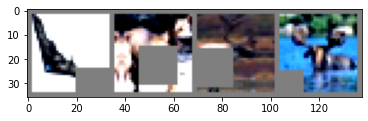

In [5]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(dataloader.train_loader_Alb)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

#model Total parameters

In [32]:
import model
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = model.Net().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

#LR_Range_Test


In [23]:
from lr_range_test import LR_Range_Test
loss_func = nn.CrossEntropyLoss()
LR_Range_Test(0.1, 0.0001 ,device, 15 ,model,loss_func,dataloader.train_loader_Albumentation )

epoch = 1 Lr = 0.0001  Loss=1.976398229598999 Batch_id=97 Accuracy=21.35: 100%|██████████| 98/98 [00:17<00:00,  5.62it/s]
epoch = 2 Lr = 0.00676  Loss=1.3432519435882568 Batch_id=97 Accuracy=40.62: 100%|██████████| 98/98 [00:17<00:00,  5.63it/s]
epoch = 3 Lr = 0.013420000000000001  Loss=0.9895267486572266 Batch_id=97 Accuracy=58.24: 100%|██████████| 98/98 [00:17<00:00,  5.59it/s]
epoch = 4 Lr = 0.02008  Loss=0.9823411107063293 Batch_id=97 Accuracy=65.35: 100%|██████████| 98/98 [00:17<00:00,  5.57it/s]
epoch = 5 Lr = 0.02674  Loss=1.0490224361419678 Batch_id=97 Accuracy=67.73: 100%|██████████| 98/98 [00:17<00:00,  5.62it/s]
epoch = 6 Lr = 0.0334  Loss=1.12850821018219 Batch_id=97 Accuracy=65.79: 100%|██████████| 98/98 [00:17<00:00,  5.53it/s]
epoch = 7 Lr = 0.04006  Loss=1.0687192678451538 Batch_id=97 Accuracy=63.58: 100%|██████████| 98/98 [00:17<00:00,  5.56it/s]
epoch = 8 Lr = 0.04672  Loss=1.1876654624938965 Batch_id=97 Accuracy=60.38: 100%|██████████| 98/98 [00:17<00:00,  5.61it/s]


In [24]:
lr_range_test.Lr

[0.0001,
 0.00109,
 0.0020800000000000003,
 0.0030700000000000002,
 0.00406,
 0.005050000000000001,
 0.00604,
 0.00703,
 0.00802,
 0.009009999999999999,
 0.0001,
 0.00676,
 0.013420000000000001,
 0.02008,
 0.02674,
 0.0334,
 0.04006,
 0.04672,
 0.05338,
 0.060039999999999996,
 0.0667,
 0.07336,
 0.08002,
 0.08668,
 0.09333999999999999]

In [25]:
lr_range_test.Lr_acc

[21.152,
 39.696,
 51.478,
 58.964,
 65.288,
 69.57,
 72.45,
 74.526,
 75.086,
 76.058,
 21.352,
 40.622,
 58.242,
 65.354,
 67.728,
 65.794,
 63.576,
 60.384,
 58.766,
 54.91,
 52.922,
 50.126,
 45.798,
 45.352,
 43.032]

In [27]:
lr_range_test.Lr = lr_range_test.Lr[10:]



In [28]:
lr_range_test.Lr

[0.0001,
 0.00676,
 0.013420000000000001,
 0.02008,
 0.02674,
 0.0334,
 0.04006,
 0.04672,
 0.05338,
 0.060039999999999996,
 0.0667,
 0.07336,
 0.08002,
 0.08668,
 0.09333999999999999]

In [29]:
 lr_range_test.Lr_acc =  lr_range_test.Lr_acc[10:]
lr_range_test.Lr_acc

[21.352,
 40.622,
 58.242,
 65.354,
 67.728,
 65.794,
 63.576,
 60.384,
 58.766,
 54.91,
 52.922,
 50.126,
 45.798,
 45.352,
 43.032]

#

#LR v/s Accuracy plot


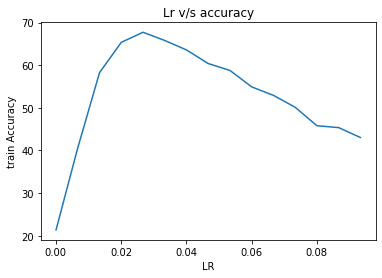

In [30]:
import lr_range_test
plt.plot( lr_range_test.Lr , lr_range_test.Lr_acc)
plt.ylabel('train Accuracy')
plt.xlabel("LR")
plt.title("Lr v/s accuracy")
plt.show()

In [34]:
#model =  model.Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01 , momentum=0.9, weight_decay=0.005) 
#scheduler = ReduceLROnPlateau(optimizer, patience = 3,min_lr=1e-4)
scheduler = OneCycleLR(optimizer,max_lr = 0.02006 ,total_steps=None,epochs=24,steps_per_epoch=1,pct_start=0.208,anneal_strategy="linear",cycle_momentum=False,base_momentum=0.85,max_momentum=0.95,div_factor=10.0,final_div_factor=1)
loss_func=nn.CrossEntropyLoss()
LR = []
for epoch in range(24):
   
    lr = optimizer.param_groups[0]['lr']
    LR.append(lr)
    print("Epoch:", epoch ," LR: ", lr)
    train.train(model, device, dataloader.train_loader_Albumentation, optimizer, loss_func, epoch)
    # scheduler.step()
    test.test(model, device, dataloader.test_loader, loss_func, last_epoch=True)
   # scheduler.step(test10.test_losses[-1])
    scheduler.step()

  0%|          | 0/98 [00:00<?, ?it/s]

Epoch: 0  LR:  0.002006


Epoch= 0 Loss=1.3250086307525635 Batch_id=97 Accuracy=38.01: 100%|██████████| 98/98 [00:17<00:00,  5.60it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 4938/10000 (49.38%)

Epoch: 1  LR:  0.006528545090180361


Epoch= 1 Loss=1.1445661783218384 Batch_id=97 Accuracy=52.09: 100%|██████████| 98/98 [00:17<00:00,  5.56it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 5983/10000 (59.83%)

Epoch: 2  LR:  0.011051090180360722


Epoch= 2 Loss=1.2344435453414917 Batch_id=97 Accuracy=58.85: 100%|██████████| 98/98 [00:17<00:00,  5.57it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 7029/10000 (70.29%)

Epoch: 3  LR:  0.015573635270541081


Epoch= 3 Loss=0.8875654935836792 Batch_id=97 Accuracy=65.47: 100%|██████████| 98/98 [00:17<00:00,  5.56it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 7212/10000 (72.12%)

Epoch: 4  LR:  0.020052401515151516


Epoch= 4 Loss=0.8508343696594238 Batch_id=97 Accuracy=69.53: 100%|██████████| 98/98 [00:17<00:00,  5.58it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 7372/10000 (73.72%)

Epoch: 5  LR:  0.01910259090909091


Epoch= 5 Loss=0.6972422003746033 Batch_id=97 Accuracy=74.89: 100%|██████████| 98/98 [00:17<00:00,  5.50it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0013, Accuracy: 7932/10000 (79.32%)

Epoch: 6  LR:  0.018152780303030303


Epoch= 6 Loss=0.6899505257606506 Batch_id=97 Accuracy=77.07: 100%|██████████| 98/98 [00:17<00:00,  5.48it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0012, Accuracy: 8060/10000 (80.60%)

Epoch: 7  LR:  0.0172029696969697


Epoch= 7 Loss=0.5397270321846008 Batch_id=97 Accuracy=80.31: 100%|██████████| 98/98 [00:17<00:00,  5.60it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8343/10000 (83.43%)

Epoch: 8  LR:  0.016253159090909092


Epoch= 8 Loss=0.49834123253822327 Batch_id=97 Accuracy=81.36: 100%|██████████| 98/98 [00:17<00:00,  5.57it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8111/10000 (81.11%)

Epoch: 9  LR:  0.015303348484848486


Epoch= 9 Loss=0.5584633946418762 Batch_id=97 Accuracy=82.57: 100%|██████████| 98/98 [00:17<00:00,  5.62it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8307/10000 (83.07%)

Epoch: 10  LR:  0.01435353787878788


Epoch= 10 Loss=0.5128210783004761 Batch_id=97 Accuracy=83.74: 100%|██████████| 98/98 [00:17<00:00,  5.59it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8471/10000 (84.71%)

Epoch: 11  LR:  0.013403727272727272


Epoch= 11 Loss=0.4270302951335907 Batch_id=97 Accuracy=84.87: 100%|██████████| 98/98 [00:17<00:00,  5.66it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8356/10000 (83.56%)

Epoch: 12  LR:  0.012453916666666669


Epoch= 12 Loss=0.3781675696372986 Batch_id=97 Accuracy=86.17: 100%|██████████| 98/98 [00:17<00:00,  5.69it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8339/10000 (83.39%)

Epoch: 13  LR:  0.011504106060606062


Epoch= 13 Loss=0.3494153320789337 Batch_id=97 Accuracy=86.59: 100%|██████████| 98/98 [00:17<00:00,  5.57it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8795/10000 (87.95%)

Epoch: 14  LR:  0.010554295454545457


Epoch= 14 Loss=0.3407072126865387 Batch_id=97 Accuracy=87.41: 100%|██████████| 98/98 [00:17<00:00,  5.65it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8798/10000 (87.98%)

Epoch: 15  LR:  0.009604484848484848


Epoch= 15 Loss=0.32638534903526306 Batch_id=97 Accuracy=87.99: 100%|██████████| 98/98 [00:17<00:00,  5.63it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8584/10000 (85.84%)

Epoch: 16  LR:  0.008654674242424243


Epoch= 16 Loss=0.2861529588699341 Batch_id=97 Accuracy=88.93: 100%|██████████| 98/98 [00:17<00:00,  5.64it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8561/10000 (85.61%)

Epoch: 17  LR:  0.007704863636363636


Epoch= 17 Loss=0.29740291833877563 Batch_id=97 Accuracy=89.80: 100%|██████████| 98/98 [00:17<00:00,  5.69it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 8929/10000 (89.29%)

Epoch: 18  LR:  0.006755053030303031


Epoch= 18 Loss=0.2758074402809143 Batch_id=97 Accuracy=90.35: 100%|██████████| 98/98 [00:17<00:00,  5.72it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 8918/10000 (89.18%)

Epoch: 19  LR:  0.0058052424242424246


Epoch= 19 Loss=0.26665571331977844 Batch_id=97 Accuracy=91.04: 100%|██████████| 98/98 [00:17<00:00,  5.56it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 8939/10000 (89.39%)

Epoch: 20  LR:  0.0048554318181818195


Epoch= 20 Loss=0.24661840498447418 Batch_id=97 Accuracy=91.69: 100%|██████████| 98/98 [00:17<00:00,  5.64it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 9054/10000 (90.54%)

Epoch: 21  LR:  0.0039056212121212144


Epoch= 21 Loss=0.21177798509597778 Batch_id=97 Accuracy=92.18: 100%|██████████| 98/98 [00:17<00:00,  5.57it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0005, Accuracy: 9139/10000 (91.39%)

Epoch: 22  LR:  0.0029558106060606076


Epoch= 22 Loss=0.22994032502174377 Batch_id=97 Accuracy=93.03: 100%|██████████| 98/98 [00:17<00:00,  5.57it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0005, Accuracy: 9159/10000 (91.59%)

Epoch: 23  LR:  0.002006000000000001


Epoch= 23 Loss=0.17721402645111084 Batch_id=97 Accuracy=93.79: 100%|██████████| 98/98 [00:17<00:00,  5.62it/s]



Test set: Average loss: 0.0005, Accuracy: 9224/10000 (92.24%)



#LR plot


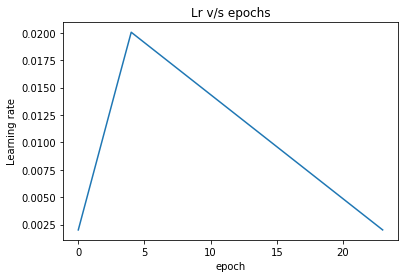

In [35]:
plt.plot(LR)
plt.ylabel('Learning rate')
plt.xlabel("epoch")
plt.title("Lr v/s epochs")
plt.show()

#Test_class_performs

In [36]:
from tqdm import tqdm

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  pbar = tqdm(dataloader.test_loader)
  for i, (data, target) in enumerate(pbar):
    data, target = data.to(device), target.to(device)
    outputs = model(data)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == target).squeeze()
    for i in range(4):
        label = target[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1
for i in range(10):
  print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

100%|██████████| 20/20 [00:02<00:00,  8.64it/s]

Accuracy of plane : 100 %
Accuracy of   car : 100 %
Accuracy of  bird : 100 %
Accuracy of   cat : 83 %
Accuracy of  deer : 100 %
Accuracy of   dog : 87 %
Accuracy of  frog : 100 %
Accuracy of horse : 100 %
Accuracy of  ship : 100 %
Accuracy of truck : 100 %


#train_&_test_accuracy

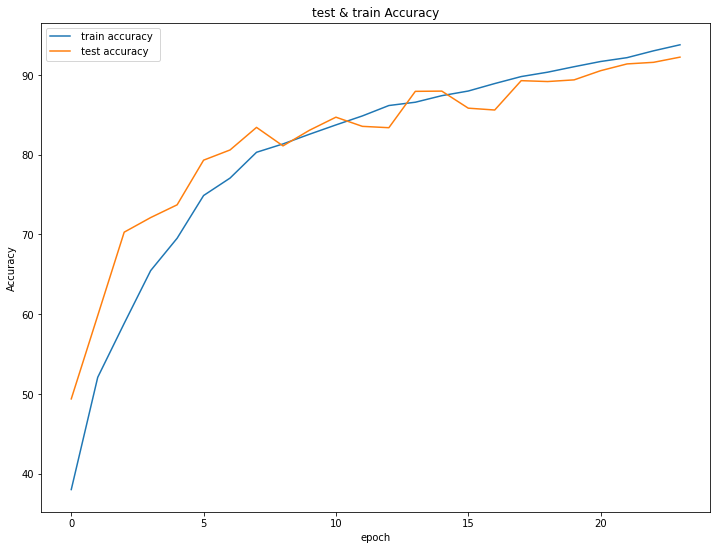

In [38]:
fig, axs = plt.subplots(1,1,figsize=(12,9))
plt.plot(train.train_acc)
plt.plot(test.test_acc)

plt.title('test & train Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend([" train accuracy ", ' test accuracy '], loc='best')
plt.show()

#Cyclic LR plot

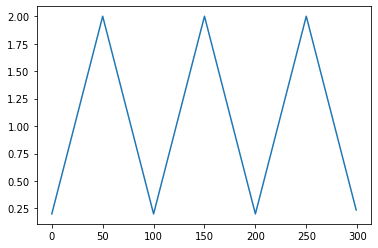

In [39]:
def Cyclic_triangular(iterations , min_lr , max_lr , step_size):
  lr_plot =[]
  for iteration in range(iterations):
    cycle = floor(1+iteration/(2*step_size))
    x = np.abs(iteration/step_size - 2*cycle + 1)
    lr = min_lr + (max_lr-min_lr)*(1-x)
    lr_plot.append(lr)
  plt.plot(list(range(iterations)),lr_plot)
Cyclic_triangular(300,0.2,2,50)